In [1]:
import numpy as np
import scipy as scipy
from scipy import optimize
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import matplotlib.ticker as ticker
import time
import peakutils
import seaborn



%matplotlib inline

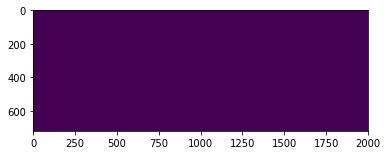

In [85]:
scan = np.load('scan_sum72.npy')
plt.imshow(scan)

(720, 160)

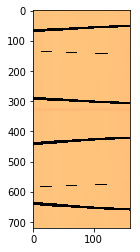

In [86]:
scan = scan[:,570:730]
plt.imshow(scan, cmap = 'copper', aspect = 0.5)
scan.shape

In [87]:
for i in range (616):
    profile = scan[i]
    if (np.any(profile<0)):
        scan = np.delete(scan, scan[i], axis=0)
        print(i)
    

49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
135
136
137
138
139
140
141
142
143
144
145
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
574
575
576
577
578
579
580
581
582
583
584


H:\PROG\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  after removing the cwd from sys.path.
H:\PROG\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  after removing the cwd from sys.path.


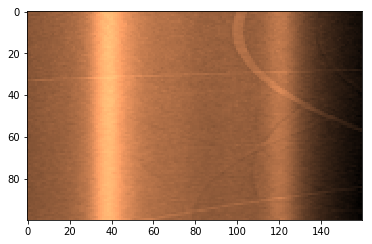

In [98]:
narrow_scan = scan[170:270]
plt.imshow(narrow_scan, cmap = 'copper')

In [92]:
plt.imsave('narrow.png', narrow_scan)

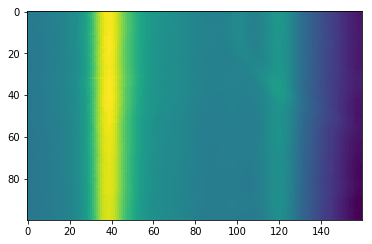

In [140]:
import cv2
from cv2_rolling_ball import subtract_background_rolling_ball

img = cv2.imread(f'narrow.png', 0)
blur = cv2.bilateralFilter(img,10,35,35)

plt.imshow(blur)


In [143]:
img, background = subtract_background_rolling_ball(blur, 50, light_background=True,
                                    use_paraboloid=False, do_presmooth=True)

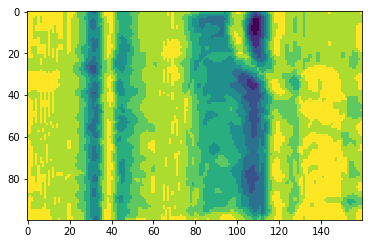

In [145]:
plt.imshow(img)
plt.imsave('rolled.png', img)

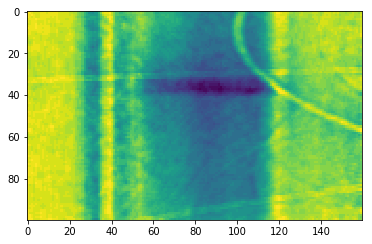

In [114]:

narrow_scan =  matplotlib.pyplot.imread('rolled.png')
plt.imshow(narrow_scan)

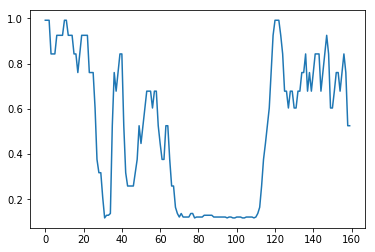

In [123]:
profile_sum = np.zeros(narrow_scan.shape[1], dtype=np.float32) 

for profile in narrow_scan[:,:,0]:
    profile_sum+=profile
    
plt.plot(profile)

TypeError: Invalid dimensions for image data

In [2]:
#Loading pre-processed profiles

q_ROI = (570,650)
chi_ROI = (0,720)

q_set = np.load('q_set.npy')
profile = np.load('1434profile.npy')

In [2]:
map_data = np.load('72trapz_map_data.npy')
#mask_data = np.load('1434mask_data.npy')

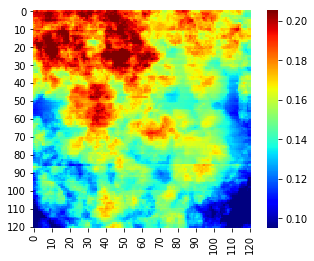

In [3]:
mesh = seaborn.heatmap(map_data, cmap = 'jet', robust = True, square = True, xticklabels = 10 , yticklabels = 10)

# Halo (baseline) correction

# Smoothing profiles

In [28]:

x = q_set[570:650]
y = profile[570:650]

In [29]:
# you cannot smooth data before statistical procedures!!!!

## Savitsky - Golay

# Fitting profiles

## Gaussian

## Voigt

In [30]:
def _1Voigt(x, ampG1, cenG1, sigmaG1, ampL1, cenL1, widL1):
    return (ampG1*(1/(sigmaG1*(np.sqrt(2*np.pi))))*(np.exp(-((x-cenG1)**2)/((2*sigmaG1)**2)))) +\
              ((ampL1*widL1**2/((x-cenL1)**2+widL1**2)) )


In [31]:


base =peakutils.baseline(y)

In [53]:
new_y = y-base

popt, pcov = scipy.optimize.curve_fit(_1Voigt, x, new_y)
perr = np.sqrt(np.diag(pcov))

popt
 #p0=[amp1, cen1, sigma1, amp2, cen2, sigma2]

array([1.        , 1.        , 1.16011208, 1.        , 1.        ,
       1.        ])

In [84]:
def _1gaussian(x, amp1,cen1,sigma1):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp(-((x-cen1)**2)/((2*sigma1)**2)))


popt1, pcov1 = scipy.optimize.curve_fit(_1gaussian, x ,new_y, p0 = [0.00004, 1.335,0.01])
popt1
pcov1

array([[inf, inf, inf],
       [inf, inf, inf],
       [inf, inf, inf]])

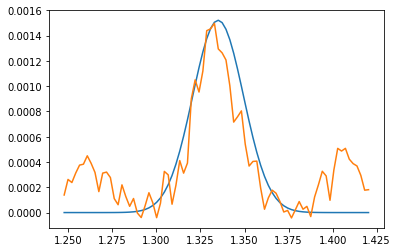

In [83]:
plt.figure()
#plt.plot(x, _1Voigt(x, *popt))
plt.plot(x, _1gaussian(x, *popt1))
#plt.plot(x,y)
#plt.plot(x, base)
plt.plot(x, new_y)
